## Часть I: О теореме Байеса

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

#### Задача 1

Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!
Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


#### Ответ
A - у подсудимого редкая группа крови

B - у виновного редкая группа крови

C - подсудимый виновен



Прокурор оценил 1 - P(A), то есть можно сказать, что любой носитель данной группы виновен с вероятностью 0.99 

Должен был оценить $$ p(C|A, B) = \frac{p(A|С, B)p(C|B)}{p(A|С, B)p(C|B) + p(A|\bar{С}, B)p(\bar{C}|B)}$$



#### Задача 2
Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?

#### Ответ

Адвокат оценил вероятность того, что случайно взятый носитель данной группы - убийца. $$\frac{1}{10000}$$

Должен был оценить вероятность как и в ответе на первый вопрос

#### Задача 3
Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


#### Ответ


Вероятность того, что человек с положительным тестом болен $$p(d_1|t_1) = \frac{p(t_1|d_1)p(d_1)}{p(t_1|d_1)p(d_1) + p(t_1|d_0)p(d_0)}$$

Вероятность того, что человек с отрицательным тестом болен $$p(d_1|t_0) = \frac{p(t_0|d_1)p(d_1)}{p(t_0|d_1)p(d_1) + p(t_0|d_0)p(d_0)}$$

In [199]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import multivariate_normal
from sklearn.linear_model import LinearRegression

In [2]:
def compute_posterior(fp, fn, p_d=0.01, test_result=True):
    if test_result:
        return (1 - fn) * p_d / ((1 - fn) * p_d + fp * (1 - p_d))
    return fn * p_d / (fn * p_d + (1 - fp) * (1 - p_d))

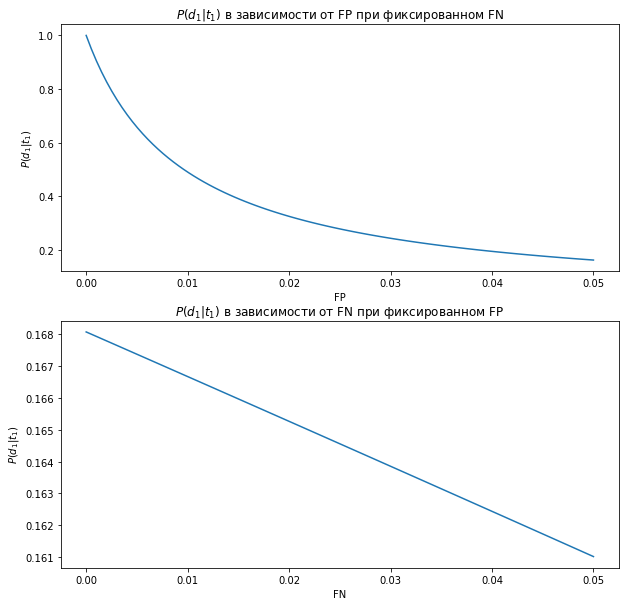

In [3]:
fp = np.linspace(0.05, 0.0, 100)
fn = np.linspace(0.05, 0.0, 100)

fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].set_title('$P(d_1|t_1)$ в зависимости от FP при фиксированном FN')

axes[0].plot(fp, compute_posterior(fp=fp, fn=0.05))

axes[0].set_xlabel('FP')
axes[0].set_ylabel('$P(d_1|t_1)$')

axes[1].plot(fn, compute_posterior(fp=0.05, fn=fn))
axes[1].set_xlabel('FN')
axes[1].set_ylabel('$P(d_1|t_1)$')
axes[1].set_title('$P(d_1|t_1)$ в зависимости от FN при фиксированном FP')
plt.show()

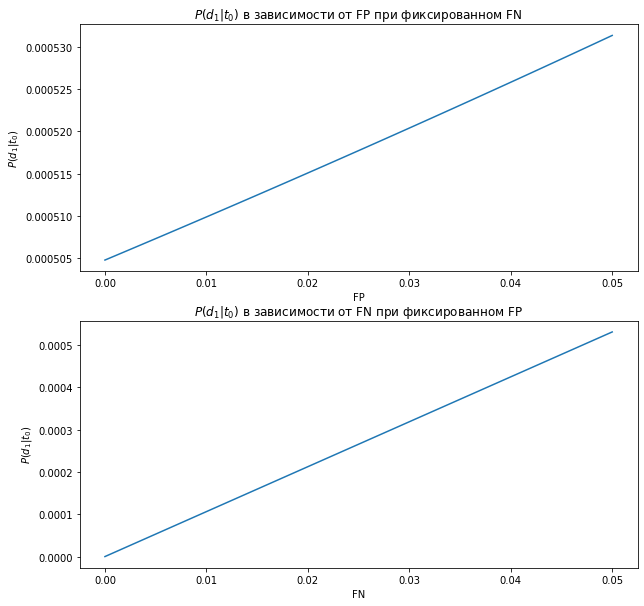

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].set_title('$P(d_1|t_0)$ в зависимости от FP при фиксированном FN')

axes[0].plot(fp, compute_posterior(fp=fp, fn=0.05, test_result=False))

axes[0].set_xlabel('FP')
axes[0].set_ylabel('$P(d_1|t_0)$')

axes[1].plot(fn, compute_posterior(fp=0.05, fn=fn, test_result=False))
axes[1].set_xlabel('FN')
axes[1].set_ylabel('$P(d_1|t_0)$')
axes[1].set_title('$P(d_1|t_0)$ в зависимости от FN при фиксированном FP')
plt.show()

#### Вывод 
Из графиков видно, что снижение ложно-положительных результатов позволит улучшить качество диагностирования заболевания, что позволит не тратить время на лечение здоровых людей

## Часть II: О линейной регрессии

#### Задача 1

Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.


In [5]:
df = pd.read_csv("owid-covid-data.csv", converters={'date': pd.to_datetime})

In [6]:
russia = df[(df.location == 'Russia') & (df.date >= pd.to_datetime("2020-03-03"))]

In [7]:
russia.new_cases = russia.new_cases.apply(lambda x: x if x > 0 else 1)

/home/panda/envs/made_aml/lib/python3.8/site-packages/pandas/core/generic.py:5491: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
russia = russia.reset_index()

In [9]:
train = russia.iloc[:50]

In [10]:
test = russia.iloc[50:]

In [11]:
train.shape, test.shape

((50, 60), (308, 60))

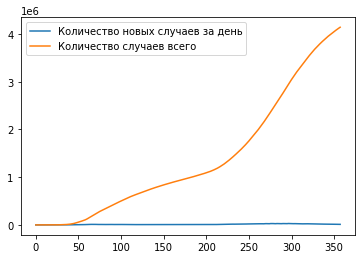

In [12]:
plt.plot(russia["new_cases"], label="Количество новых случаев за день")
plt.plot(russia["total_cases"], label="Количество случаев всего")
plt.legend();

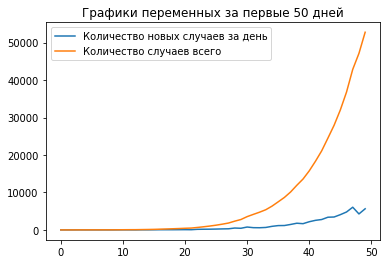

In [13]:
plt.plot(train["new_cases"], label="Количество новых случаев за день")
plt.plot(train["total_cases"], label="Количество случаев всего")
plt.title("Графики переменных за первые 50 дней")
plt.legend();

In [14]:
y_train = np.log(train['total_cases'])
y_test = np.log(test['total_cases'])

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [200]:
model = LinearRegression()
model.fit(train.index.values.reshape(-1, 1), y_train)
y_pred_train = model.predict(train.index.values.reshape(-1, 1))
y_pred = model.predict(test.index.values.reshape(-1, 1))

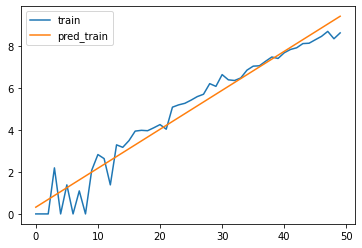

In [201]:
plt.plot(y_train, label="train")
plt.plot(y_pred_train, label="pred_train")
plt.legend();

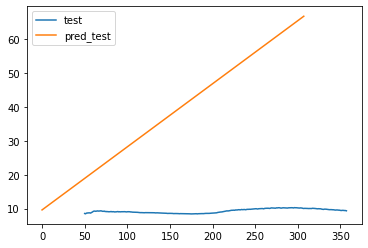

In [202]:
plt.plot(y_test, label="test")
plt.plot(y_pred, label="pred_test")
plt.legend();

Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [203]:
true_mu = [model.intercept_, model.coef_[0]]
true_mu

[0.3206875188996463, 0.18596309168510522]

In [204]:
def true_curve(x, true_mu):
    return true_mu[0] + true_mu[1] * x

In [205]:
sigma = (y_train - y_pred_train).std()
sigma

0.6021297649662455

In [206]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [207]:
def myplot_heatmap(X, Y, Z, xs, ys, true_mu):
    # Make the plot
    plt.axis('equal')
    plt.xlim(xs)
    plt.ylim(ys)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.scatter(true_mu[0], true_mu[1], marker='*', s=120)

In [208]:
cur_mu, cur_sigma = np.array([0, 0]), 2 * np.array([[1, 0], [0, 1]])

(250, 250)


<ipython-input-207-be0d20748f24>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


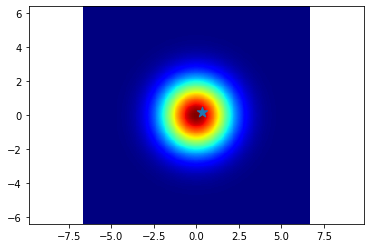

In [209]:
N = 250
dw0 = abs(cur_mu[0] - true_mu[0]) * 2 + 3 * cur_sigma[0][0]
dw1 = abs(cur_mu[1] - true_mu[1]) * 2 + 3 * cur_sigma[1][1]
xl = cur_mu[0] - dw0
xr = cur_mu[0] + dw0
yl = cur_mu[1] - dw1
yr = cur_mu[1] + dw1
X = np.linspace(xl, xr, N)
Y = np.linspace(yl, yr, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
print(Z.shape)
myplot_heatmap(X, Y, Z, xs, ys, true_mu);

In [210]:
def get_likelihood(px, py, sigma=.5):
    return lambda x : np.exp(-(x[0] + x[1]*px - py) ** 2) / (2 * sigma * np.sqrt(2.*np.pi))

<ipython-input-207-be0d20748f24>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)


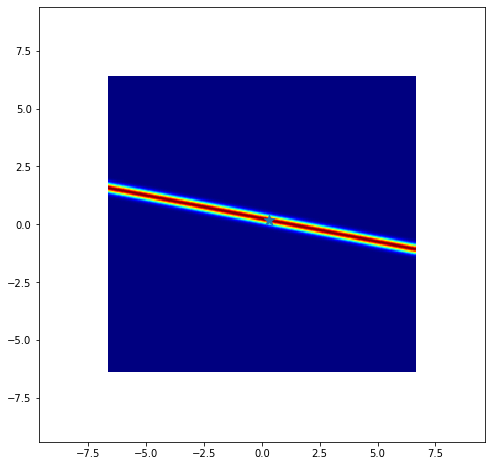

In [211]:
px = 5
py = true_curve(px, true_mu)
cur_likelihood = get_likelihood(px, py, sigma)
Z = np.array([[ cur_likelihood(pos[i, j]) for j in range(pos.shape[1])] for i in range(pos.shape[0])])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((xs[0], xs[-1]))
ax.set_ylim((-2, 2))
myplot_heatmap(X, Y, Z, xs, ys, true_mu);

In [212]:
cur_mu, cur_sigma = np.array([0, 0]), 2 * np.array([[1, 0], [0, 1]])
for i in range(0, 50):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, i, y_train[i], sigma)

In [213]:
print(true_mu, cur_mu)

[0.3206875188996463, 0.18596309168510522] [0.31631449 0.18609477]


Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

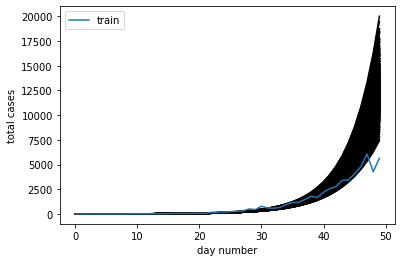

In [214]:
N = 1000
X = train.index.values.reshape(-1, 1)
random_w = multivariate_normal(mean=cur_mu, cov=cur_sigma).rvs(size=N)
for w in random_w:
    y = np.exp(true_curve(X, w))
    plt.plot(X, y, 'k-')
plt.plot(X, np.exp(y_train), label='train')
plt.xlabel('day number')
plt.ylabel('total cases')
plt.legend()
plt.show()

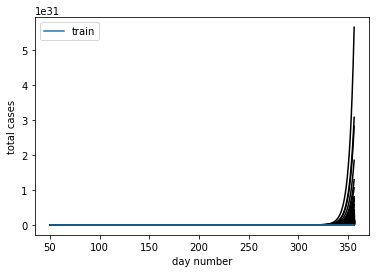

In [215]:
N = 1000
days = -1
X = test.index.values.reshape(-1, 1)[:days]
random_w = multivariate_normal(mean=cur_mu, cov=cur_sigma).rvs(size=N)
for w in random_w:
    y = np.exp(true_curve(X, w))
    plt.plot(X, y, 'k-')
plt.plot(X, np.exp(y_test[:days]), label='train')
plt.xlabel('day number')
plt.ylabel('total cases')
plt.legend()
plt.show()

In [216]:
need_days = ['2020-05-01', '2020-06-01', '2020-09-01']
days_index = russia.loc[russia.date.isin(need_days)].index.values

In [217]:
mean = random_w.mean(axis=0)

y = np.exp(true_curve(days_index, mean))
print("\n".join([f"К {day} число заболевших будет {count}" for day, count in zip(need_days, y)]))

К 2020-05-01 число заболевших будет 80739.87785947665
К 2020-06-01 число заболевших будет 25994933.2082565
К 2020-09-01 число заболевших будет 720101582226598.2


Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:
$$\Phi(x) = \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{x}{e^{\frac{-t^2}{2}}dt}$$

Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

Можно взять логарифм производной и обучить линейную регрессию вида на $$ln (y) = w_0 + w_1 * x + w_2 * x^2$$

Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [218]:
def get_data(indeces, y):
    return np.vstack([indeces, indeces ** 2]).T, np.log(y)
X_train, y_train = get_data(train.index.values, train.new_cases)
X_test, y_test = get_data(test.index.values, test.new_cases)

In [225]:
new_model = LinearRegression()
new_model.fit(X_train, y_train)
y_pred_train = new_model.predict(X_train)
y_pred = np.exp(new_model.predict(X_test))

In [283]:
sigma = (y_train - y_pred_train).std()
sigma

0.4941358580329243

In [285]:
def bayesian_update(mu, sigma, x, y, sigma_noise=.25):
    x_matrix = np.array([[1, x, x * x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [286]:
cur_mu, cur_sigma = np.array([0, 0, 0]), 2 * np.eye(3)
for i in range(0, 50):
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, i, y_train[i], sigma)

In [287]:
X = np.hstack([X_train, np.ones(X_train.shape[0]).reshape(-1, 1)])
w = np.hstack([new_model.coef_, new_model.intercept_])

In [331]:
plt.rcParams["figure.figsize"] = (16,8)

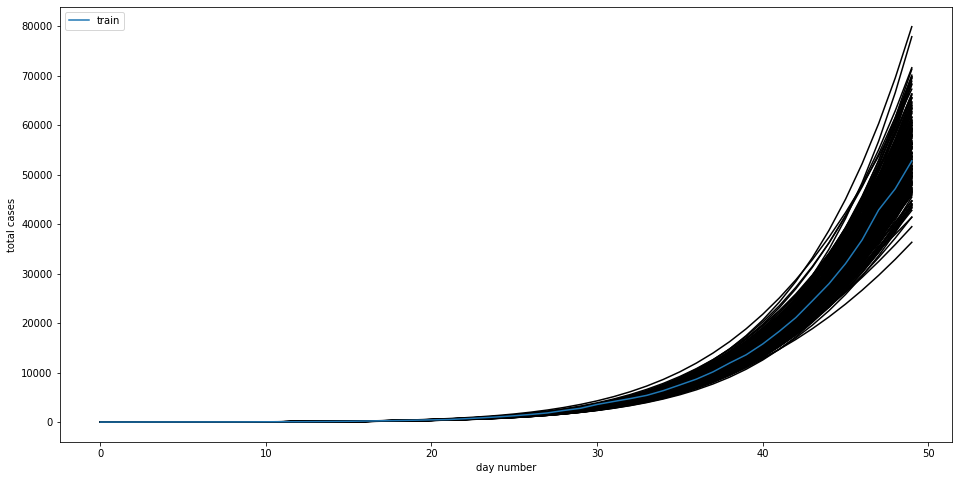

In [334]:
N = 250
X = np.hstack([np.ones(X_train.shape[0]).reshape(-1, 1), X_train])
random_w = multivariate_normal(mean=cur_mu, cov=cur_sigma).rvs(size=N)
last_count = []
for w in random_w:
    y = np.cumsum(np.exp(X @ w))
    last_count.append(y[y.shape[0] - 1])
    plt.plot(X[:,1], y, 'k-')
plt.plot(X[:,1], np.cumsum(np.exp(y_train)), label='train')
plt.xlabel('day number')
plt.ylabel('total cases')
plt.legend()
plt.show()

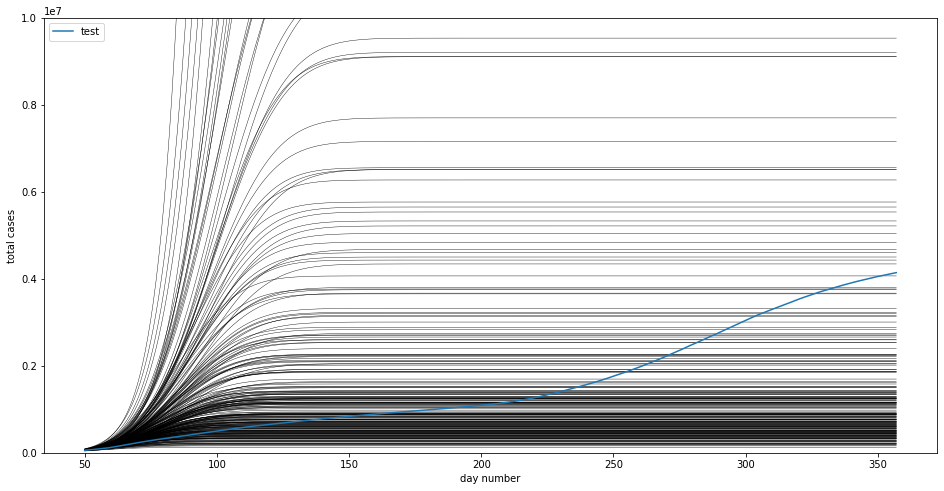

In [337]:
X = np.hstack([np.ones(X_test.shape[0]).reshape(-1, 1), X_test])
for i, w in enumerate(random_w):
    y = last_count[i] + np.cumsum(np.exp(X @ w))
    plt.plot(X[:, 1], y, 'k-', lw=.4)
plt.plot(X[:, 1], np.cumsum(np.exp(y_train))[y_train.shape[0] - 1] + np.cumsum(np.exp(y_test)), label='test')
plt.xlabel('day number')
plt.ylabel('total cases')
plt.ylim(0, 1e7)
plt.legend()
plt.show()